In [1]:
from geopy import distance
import math
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt

#some pd parameters that help df output display more nicely
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'left')


# some sample data points printed out from the real track example:
startdict1 = {'xc': -51.94423661652254, 'yc': 47.75, 'tc': pd.to_datetime('2016-11-28 00:22:29.957362031'), 'edges': [[(-51.91666793823242, 47.75), (-52.0, 47.75)]], 'incells': [[150, 151]]}
enddict1 = {'xc': -51.923248158428926, 'yc': 47.75, 'tc': pd.to_datetime('2016-11-28 11:44:58.513692169'), 'edges': [[(-51.91666793823242, 47.75), (-52.0, 47.75)]], 'incells': [[150, 151]]}
startdict2 = {'xc': -51.923248158428926, 'yc': 47.75, 'tc': pd.to_datetime('2016-11-28 11:44:58.513692169'), 'edges': [[(-51.91666793823242, 47.75), (-52.0, 47.75)]], 'incells': [[150, 151]]}
enddict2 = {'xc': -51.920011945822274, 'yc': 47.66666793823242, 'tc': pd.to_datetime('2016-11-30 01:11:48.921503273'), 'edges': [[(-51.91666793823242, 47.66666793823242), (-52.0, 47.66666793823242)]], 'incells': [[149, 150]]}
startdict3 = {'xc': -51.920011945822274, 'yc': 47.66666793823242, 'tc': pd.to_datetime('2016-11-30 01:11:48.921503273'), 'edges': [[(-51.91666793823242, 47.66666793823242), (-52.0, 47.66666793823242)]], 'incells': [[149, 150]]}
enddict3 = {'xc': -51.924730466694065, 'yc': 47.58333206176758, 'tc': pd.to_datetime('2016-12-02 01:56:22.138553079'), 'edges': [[(-51.91666793823242, 47.58333206176758), (-52.0, 47.58333206176758)]], 'incells': [[148, 149]]}
startdict4 = {'xc': -51.924730466694065, 'yc': 47.58333206176758, 'tc': pd.to_datetime('2016-12-02 01:56:22.138553079'), 'edges': [[(-51.91666793823242, 47.58333206176758), (-52.0, 47.58333206176758)]], 'incells': [[148, 149]]}
enddict4 = {'xc': -51.9371665767493, 'yc': 47.58333206176758, 'tc': pd.to_datetime('2016-12-02 17:23:33.678243640'), 'edges': [[(-51.91666793823242, 47.58333206176758), (-52.0, 47.58333206176758)]], 'incells': [[148, 149]]}
startdict5 = {'xc': -51.9371665767493, 'yc': 47.58333206176758, 'tc': pd.to_datetime('2016-12-02 17:23:33.678243640'), 'edges': [[(-51.91666793823242, 47.58333206176758), (-52.0, 47.58333206176758)]], 'incells': [[148, 149]]}
enddict5 = {'xc': -52.0, 'yc': 47.611000061035156, 'tc': pd.to_datetime('2016-12-03 09:00:00'), 'edges': [[(-52.0, 47.58333206176758), (-52.0, 47.66666793823242)]], 'incells': [[135, 149]]}
startdict6 = {'xc': -52.0, 'yc': 47.611000061035156, 'tc': pd.to_datetime('2016-12-03 09:00:00'), 'edges': [[(-52.0, 47.58333206176758), (-52.0, 47.66666793823242)]], 'incells': [[135, 149]]}
enddict6 = {'xc': -52.0, 'yc': 47.625144725622135, 'tc': pd.to_datetime('2016-12-03 12:25:38.365075128'), 'edges': [[(-52.0, 47.58333206176758), (-52.0, 47.66666793823242)]], 'incells': [[135, 149]]}
startdict7 = {'xc': -52.0, 'yc': 47.625144725622135, 'tc': pd.to_datetime('2016-12-03 12:25:38.365075128'), 'edges': [[(-52.0, 47.58333206176758), (-52.0, 47.66666793823242)]], 'incells': [[135, 149]]}
enddict7 = {'xc': -52.0, 'yc': 47.589855426965755, 'tc': pd.to_datetime('2016-12-03 18:38:35.495409920'), 'edges': [[(-52.0, 47.58333206176758), (-52.0, 47.66666793823242)]], 'incells': [[135, 149]]}
startdict8 = {'xc': -52.0, 'yc': 47.589855426965755, 'tc': pd.to_datetime('2016-12-03 18:38:35.495409920'), 'edges': [[(-52.0, 47.58333206176758), (-52.0, 47.66666793823242)]], 'incells': [[135, 149]]}
enddict8 = {'xc': -52.01141277878283, 'yc': 47.58333206176758, 'tc': pd.to_datetime('2016-12-03 19:27:30.798686440'), 'edges': [[(-52.0, 47.58333206176758), (-52.08333206176758, 47.58333206176758)]], 'incells': [[134, 135]]}
startdict9 = {'xc': -52.01141277878283, 'yc': 47.58333206176758, 'tc': pd.to_datetime('2016-12-03 19:27:30.798686440'), 'edges': [[(-52.0, 47.58333206176758), (-52.08333206176758, 47.58333206176758)]], 'incells': [[134, 135]]}
enddict9 = {'xc': -52.08333206176758, 'yc': 47.57010066112965, 'tc': pd.to_datetime('2016-12-03 23:41:48.959965648'), 'edges': [[(-52.08333206176758, 47.5), (-52.08333206176758, 47.58333206176758)]], 'incells': [[120, 134]]}
startdict10 = {'xc': -52.08333206176758, 'yc': 47.57010066112965, 'tc': pd.to_datetime('2016-12-03 23:41:48.959965648'), 'edges': [[(-52.08333206176758, 47.5), (-52.08333206176758, 47.58333206176758)]], 'incells': [[120, 134]]}
enddict10 = {'xc': -52.12034225463867, 'yc': 47.58333206176758, 'tc': pd.to_datetime('2016-12-04 04:44:56.596513089'), 'edges': [[(-52.08333206176758, 47.58333206176758), (-52.16666793823242, 47.58333206176758)]], 'incells': [[120, 121]]}
startdict11 = {'xc': -52.12034225463867, 'yc': 47.58333206176758, 'tc': pd.to_datetime('2016-12-04 04:44:56.596513089'), 'edges': [[(-52.08333206176758, 47.58333206176758), (-52.16666793823242, 47.58333206176758)]], 'incells': [[120, 121]]}
enddict11 = {'xc': -52.122069570903015, 'yc': 47.58333206176758, 'tc': pd.to_datetime('2016-12-04 06:11:06.805347836'), 'edges': [[(-52.08333206176758, 47.58333206176758), (-52.16666793823242, 47.58333206176758)]], 'incells': [[120, 121]]}
startdict12 = {'xc': -52.122069570903015, 'yc': 47.58333206176758, 'tc': pd.to_datetime('2016-12-04 06:11:06.805347836'), 'edges': [[(-52.08333206176758, 47.58333206176758), (-52.16666793823242, 47.58333206176758)]], 'incells': [[120, 121]]}
enddict12 = {'xc': -52.16666793823242, 'yc': 47.52342497976203, 'tc': pd.to_datetime('2016-12-04 13:31:01.161070691'), 'edges': [[(-52.16666793823242, 47.5), (-52.16666793823242, 47.58333206176758)]], 'incells': [[106, 120]]}
startdict13 = {'xc': -52.16666793823242, 'yc': 47.52342497976203, 'tc': pd.to_datetime('2016-12-04 13:31:01.161070691'), 'edges': [[(-52.16666793823242, 47.5), (-52.16666793823242, 47.58333206176758)]], 'incells': [[106, 120]]}
enddict13 = {'xc': -52.210139008956745, 'yc': 47.5, 'tc': pd.to_datetime('2016-12-05 00:41:31.653256659'), 'edges': [[(-52.16666793823242, 47.5), (-52.25, 47.5)]], 'incells': [[105, 106]]}
startdict14 = {'xc': -52.210139008956745, 'yc': 47.5, 'tc': pd.to_datetime('2016-12-05 00:41:31.653256659'), 'edges': [[(-52.16666793823242, 47.5), (-52.25, 47.5)]], 'incells': [[105, 106]]}
enddict14 = {'xc': -52.16666793823242, 'yc': 47.43036461876505, 'tc': pd.to_datetime('2016-12-06 07:54:23.257209829'), 'edges': [[(-52.16666793823242, 47.41666793823242), (-52.16666793823242, 47.5)]], 'incells': [[105, 119]]}
startdict15 = {'xc': -52.16666793823242, 'yc': 47.43036461876505, 'tc': pd.to_datetime('2016-12-06 07:54:23.257209829'), 'edges': [[(-52.16666793823242, 47.41666793823242), (-52.16666793823242, 47.5)]], 'incells': [[105, 119]]}
enddict15 = {'xc': -52.147646861087644, 'yc': 47.41666793823242, 'tc': pd.to_datetime('2016-12-06 10:22:45.007570529'), 'edges': [[(-52.08333206176758, 47.41666793823242), (-52.16666793823242, 47.41666793823242)]], 'incells': [[118, 119]]}
startdict16 = {'xc': -52.147646861087644, 'yc': 47.41666793823242, 'tc': pd.to_datetime('2016-12-06 10:22:45.007570529'), 'edges': [[(-52.08333206176758, 47.41666793823242), (-52.16666793823242, 47.41666793823242)]], 'incells': [[118, 119]]}
enddict16 = {'xc': -52.16666793823242, 'yc': 47.37237613326625, 'tc': pd.to_datetime('2016-12-06 14:51:44.096134198'), 'edges': [[(-52.16666793823242, 47.33333206176758), (-52.16666793823242, 47.41666793823242)]], 'incells': [[104, 118]]}

startlist = [startdict1, startdict2, startdict3, startdict4, startdict5, startdict6, startdict7, startdict8, startdict9, 
             startdict10, startdict11, startdict12, startdict13, startdict14, startdict15, startdict16]
endlist = [enddict1, enddict2, enddict3, enddict4, enddict5, enddict6, enddict7, enddict8, enddict9, enddict10, enddict11, 
           enddict12, enddict13, enddict14, enddict15, enddict16]

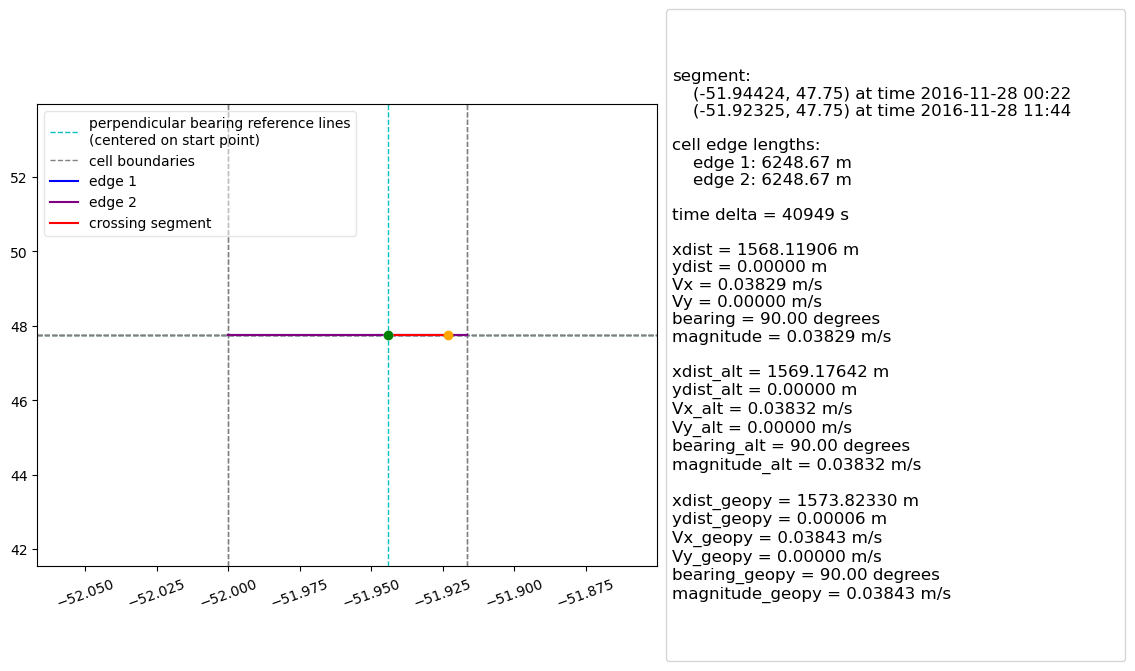

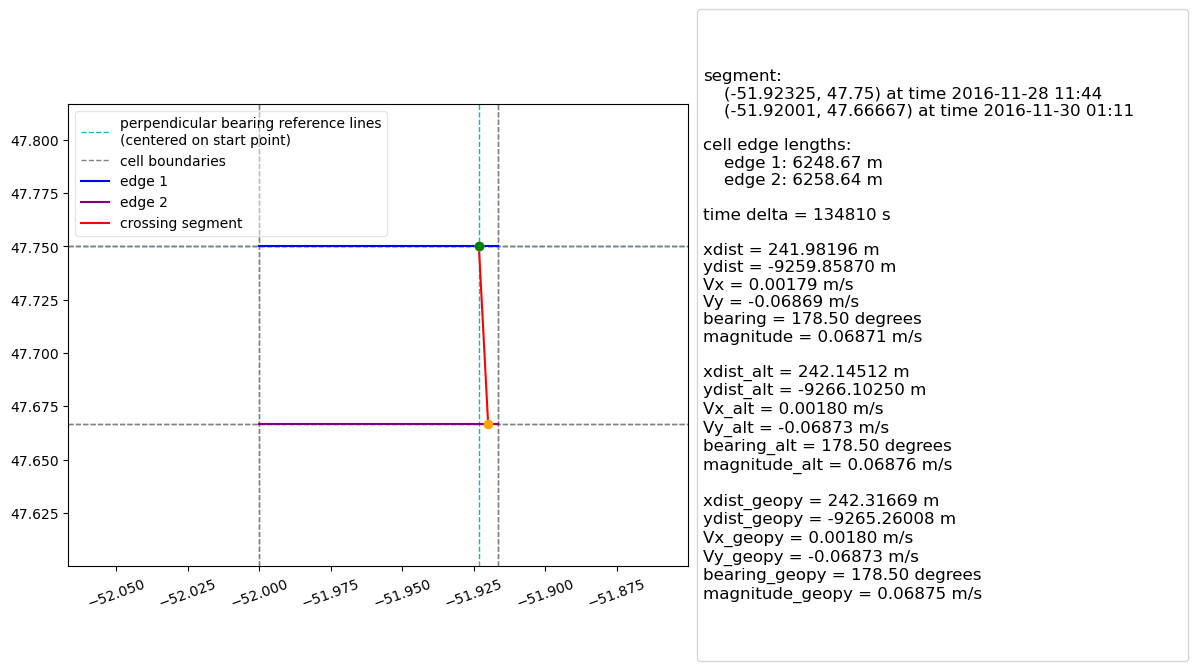

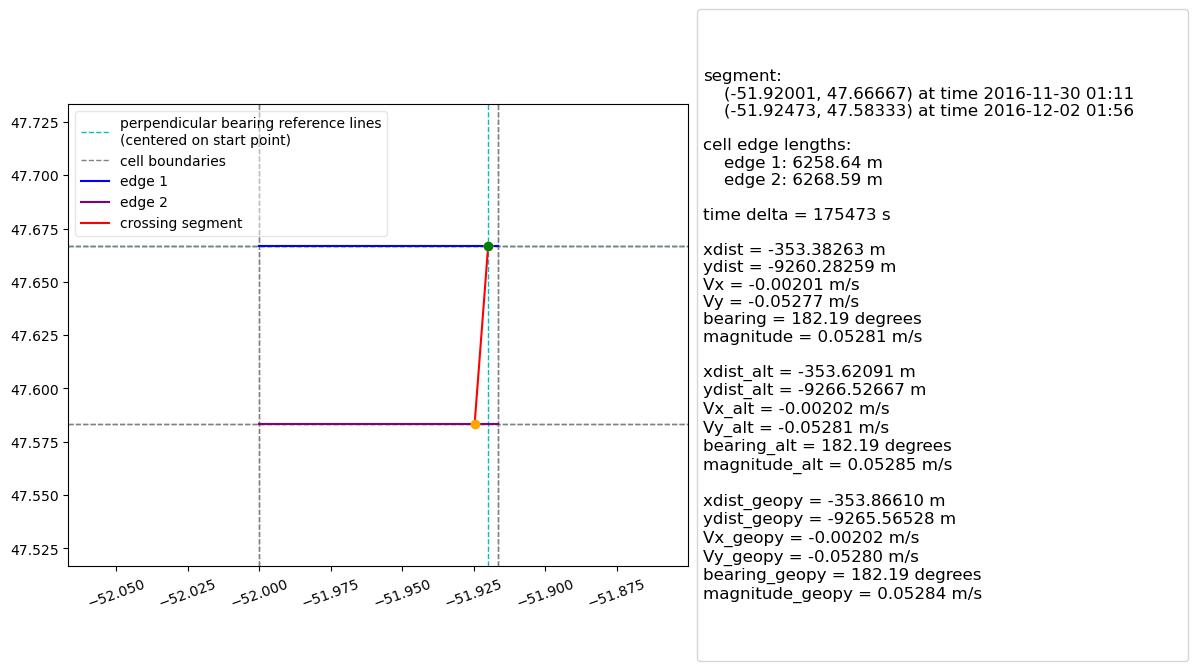

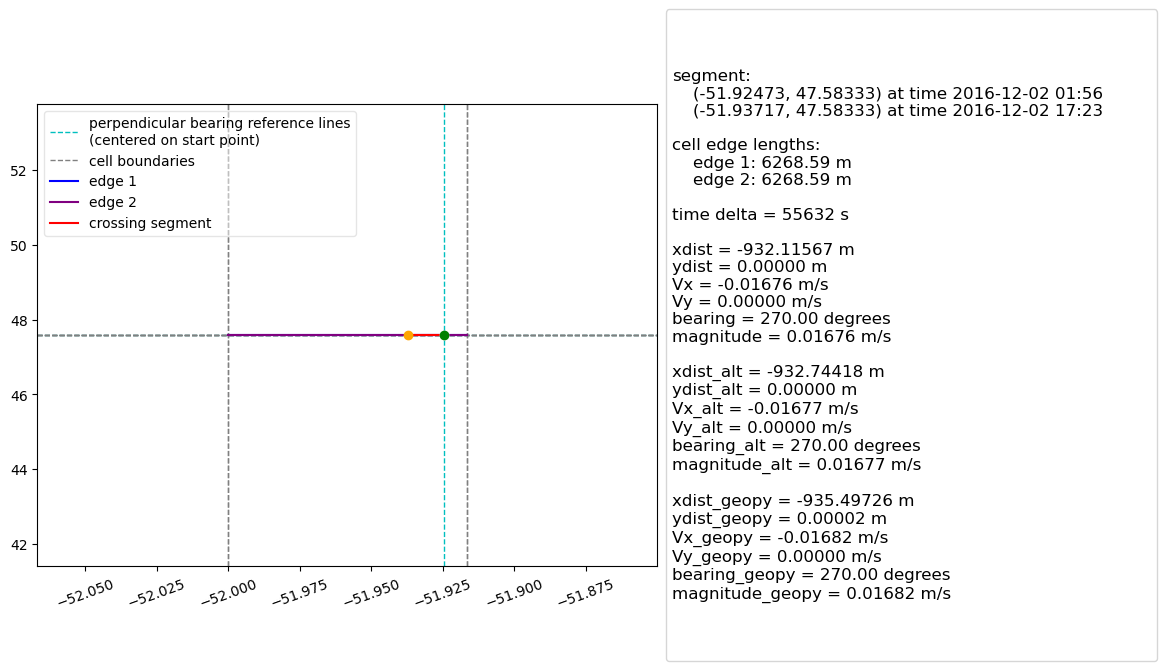

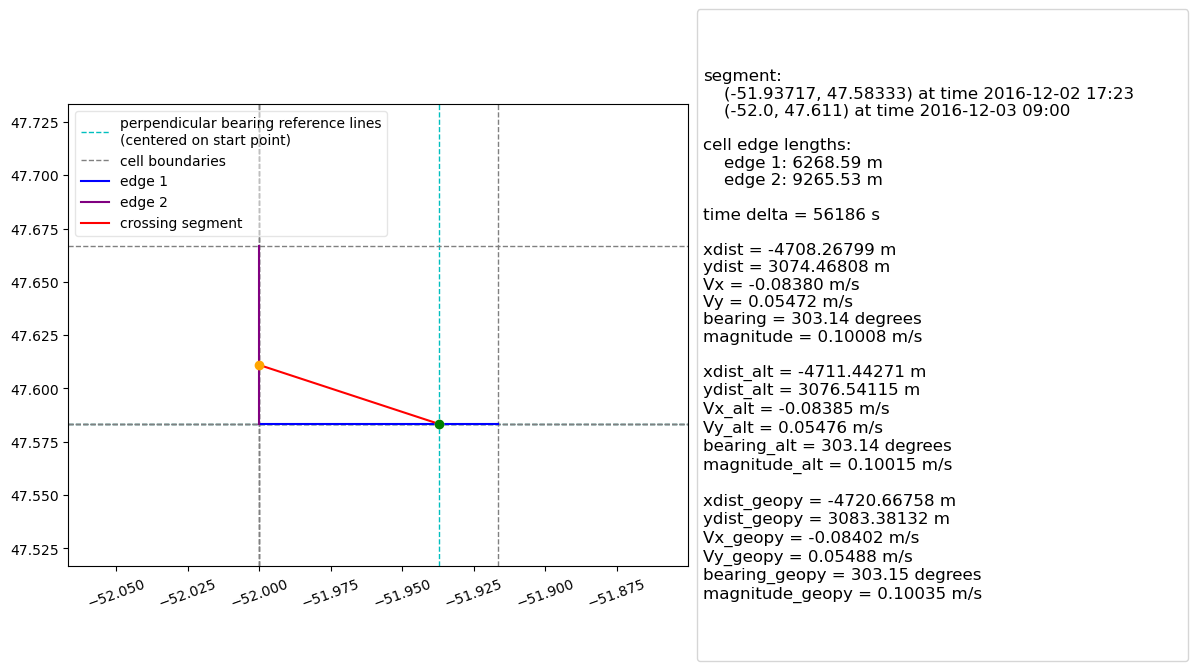

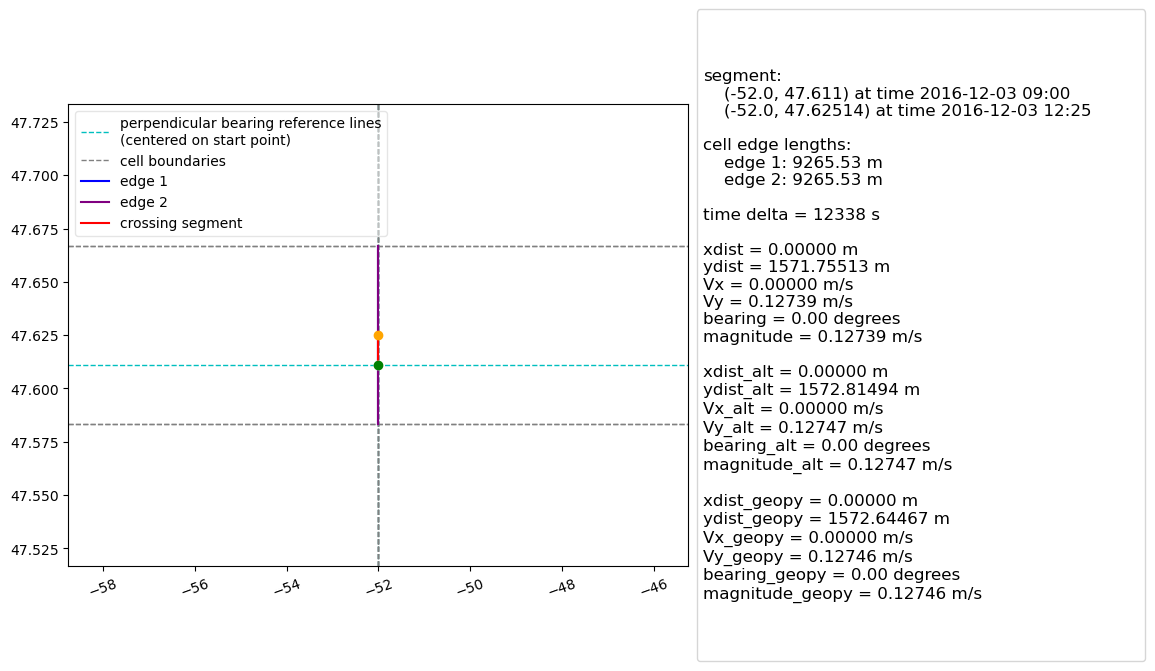

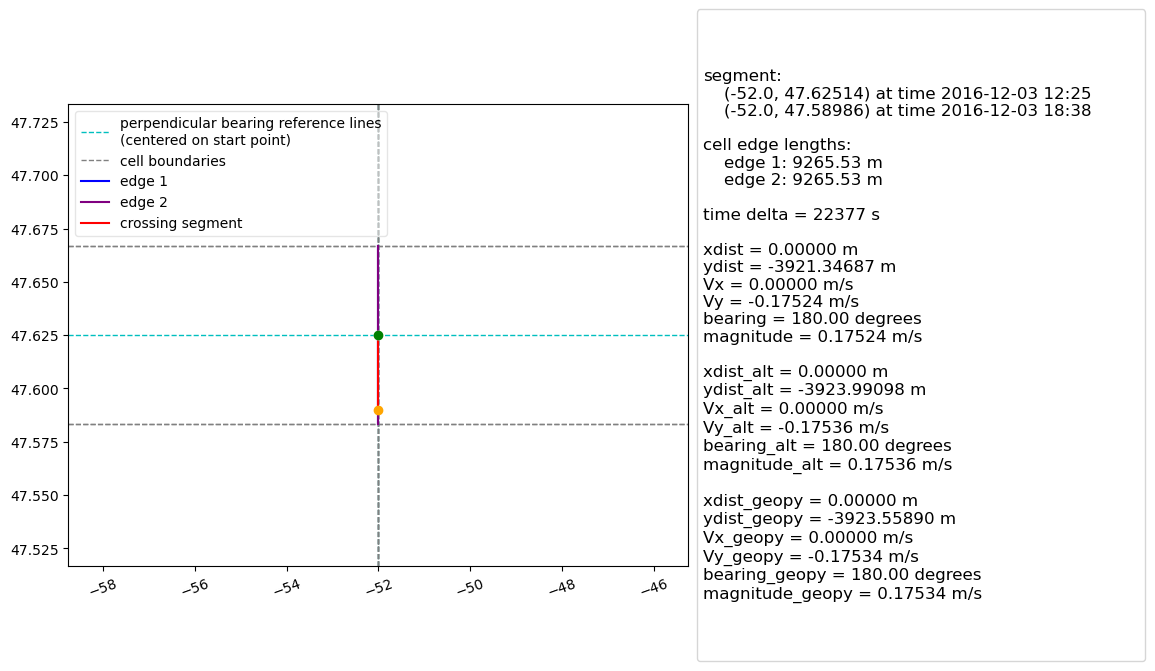

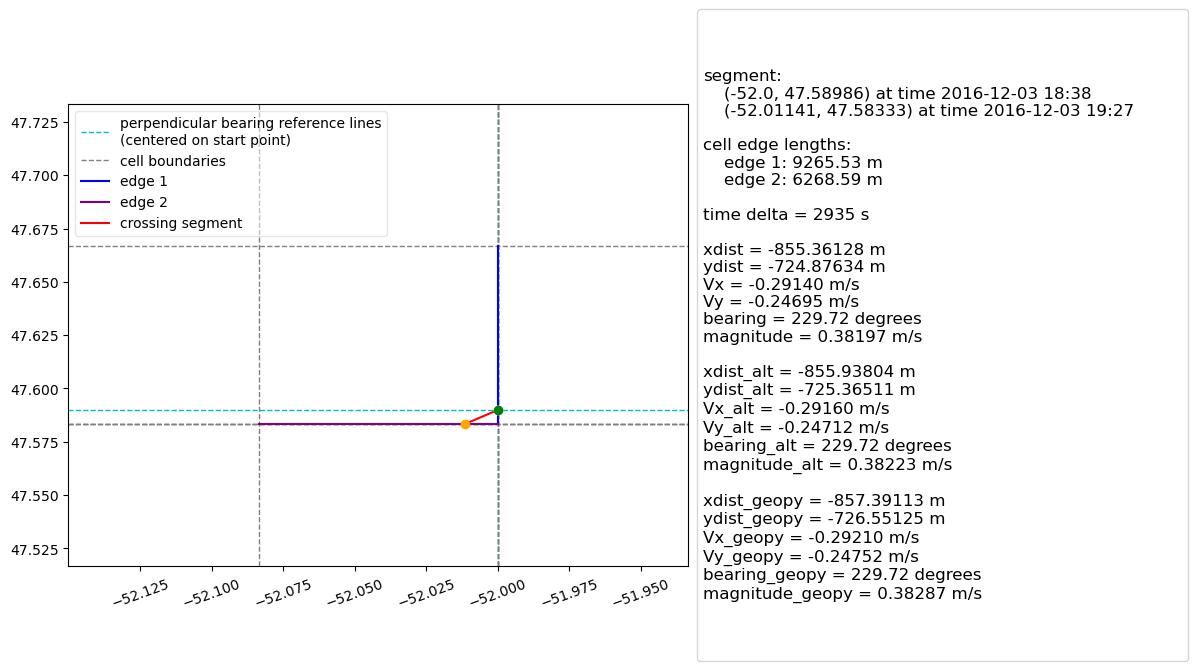

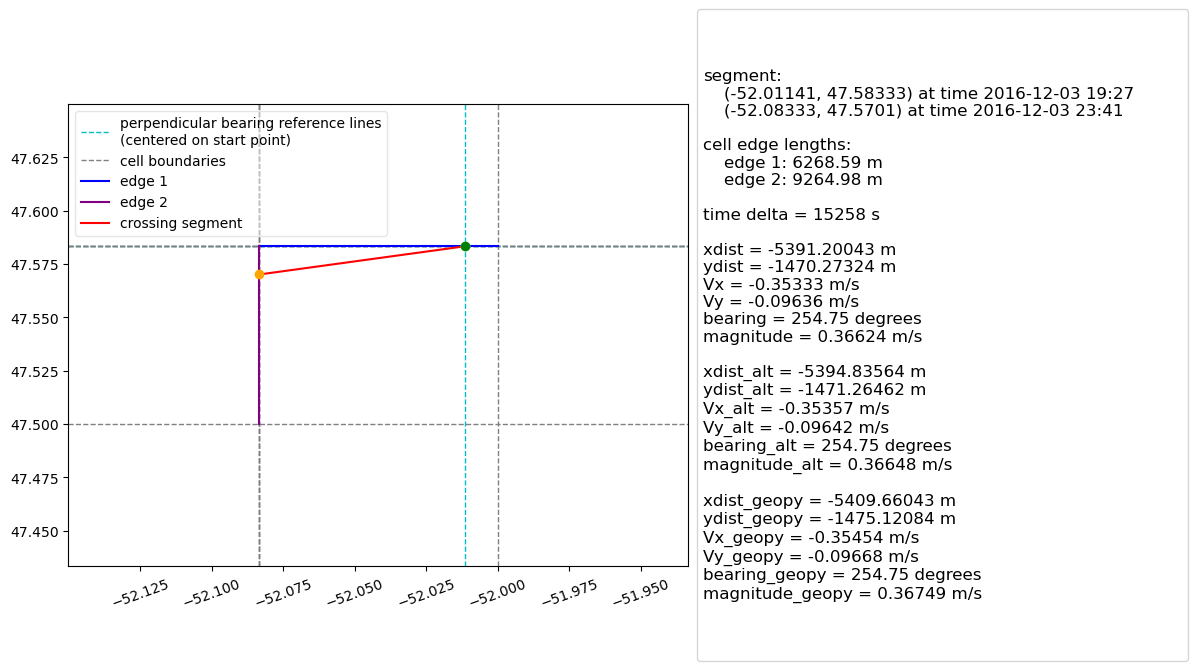

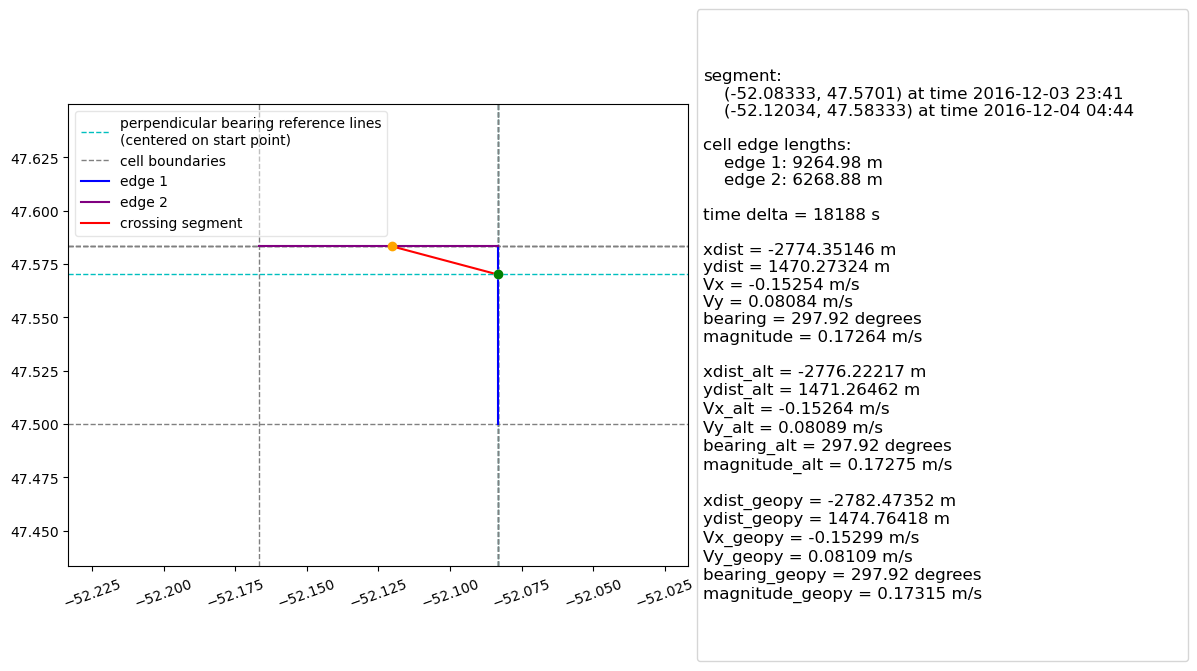

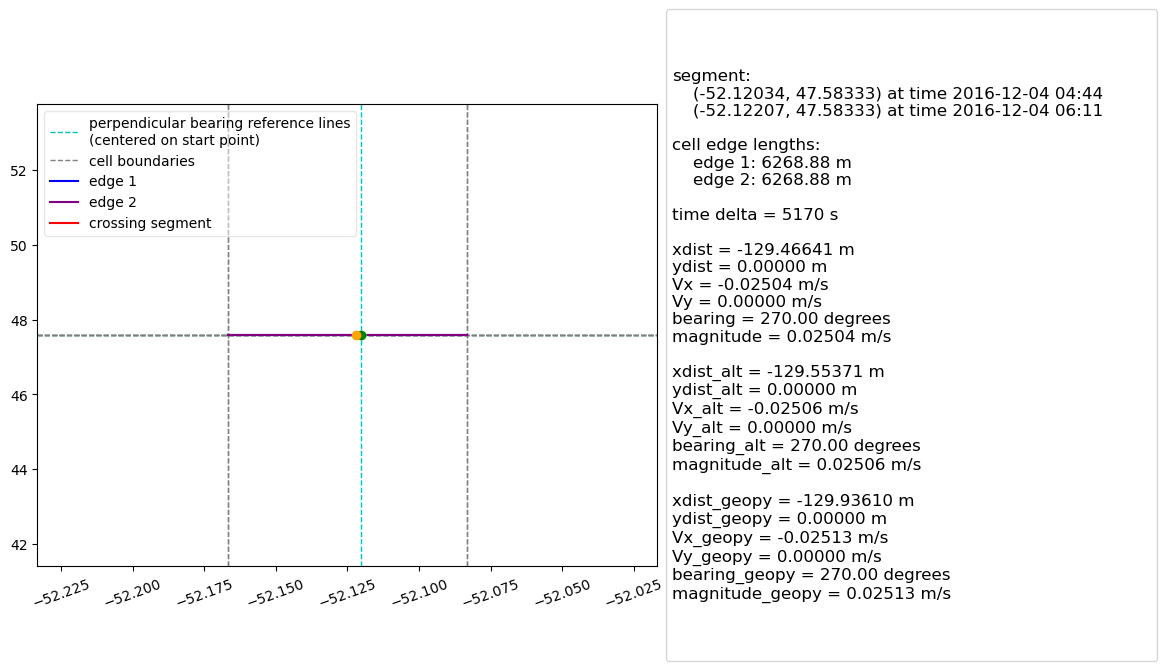

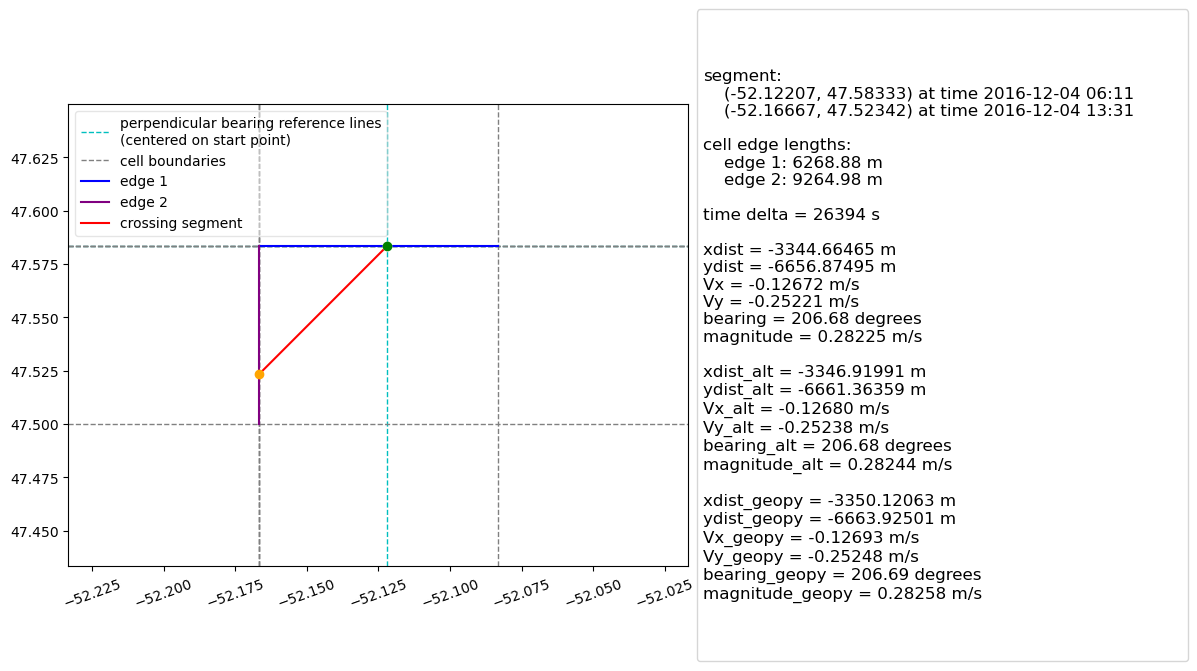

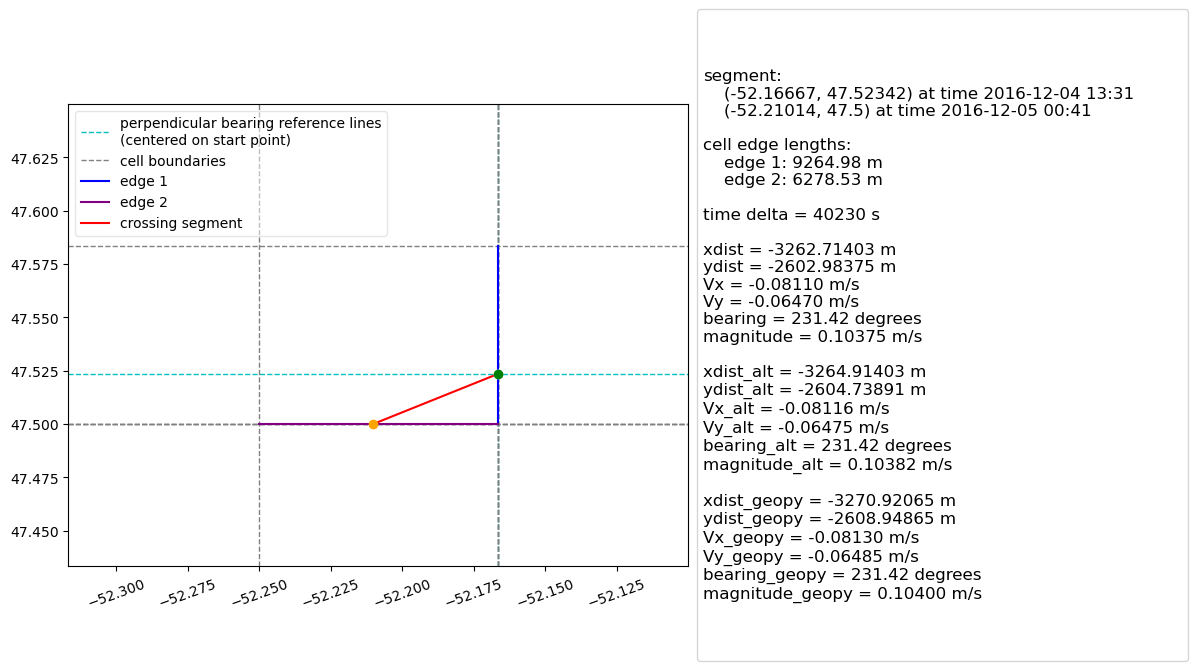

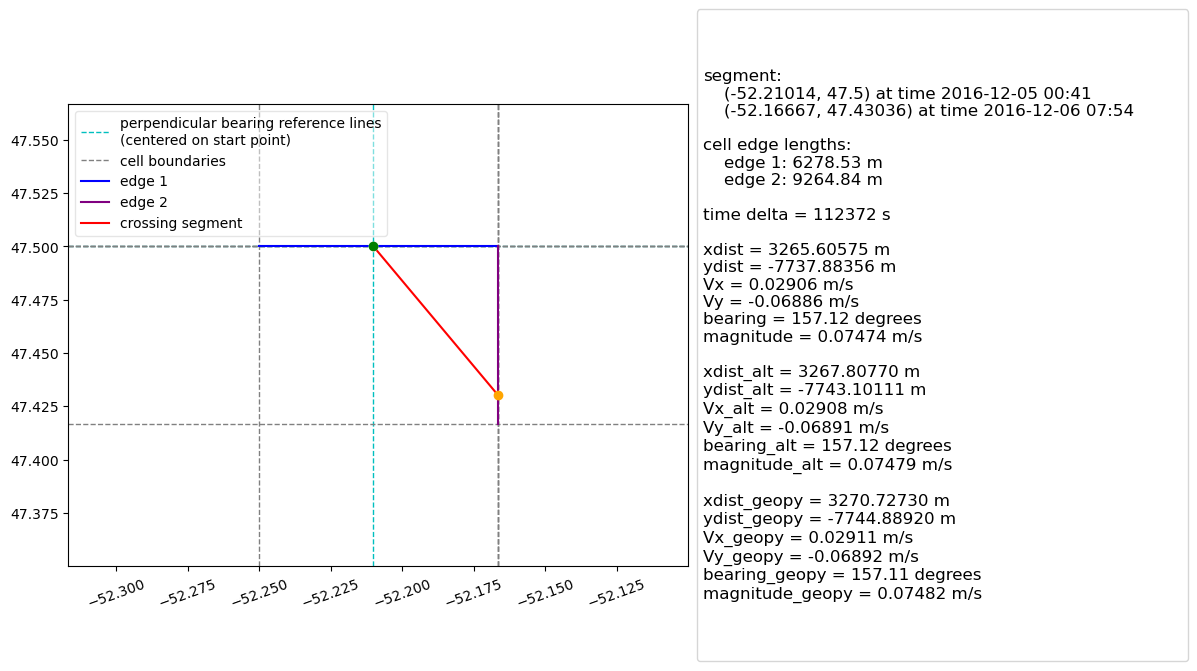

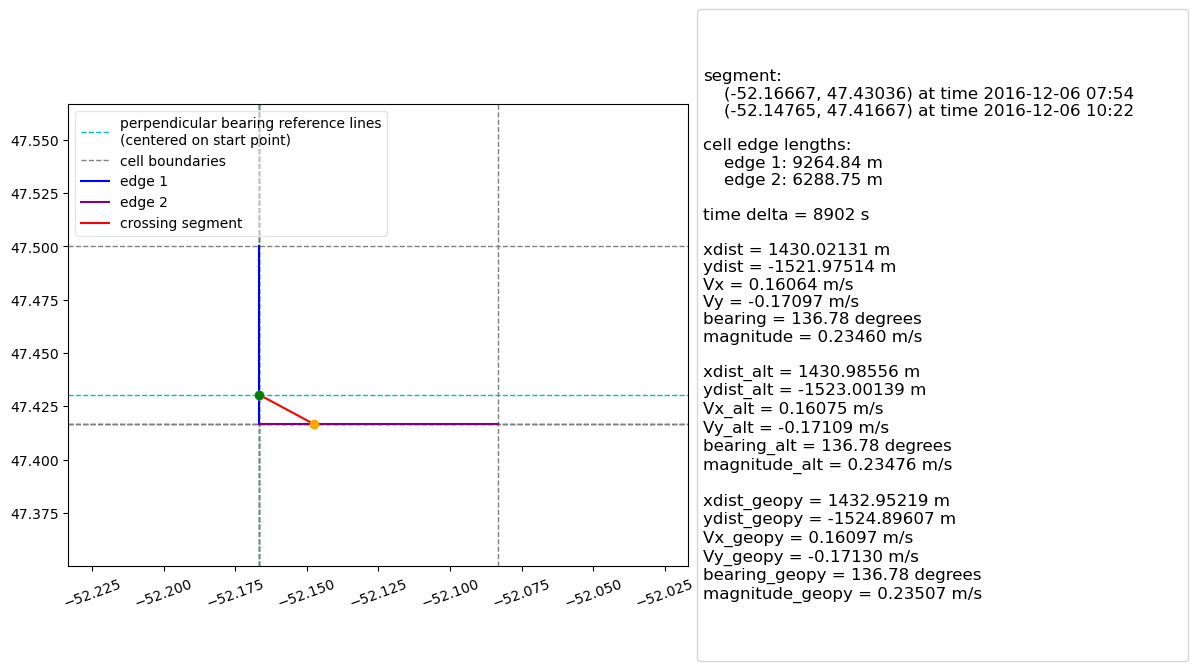

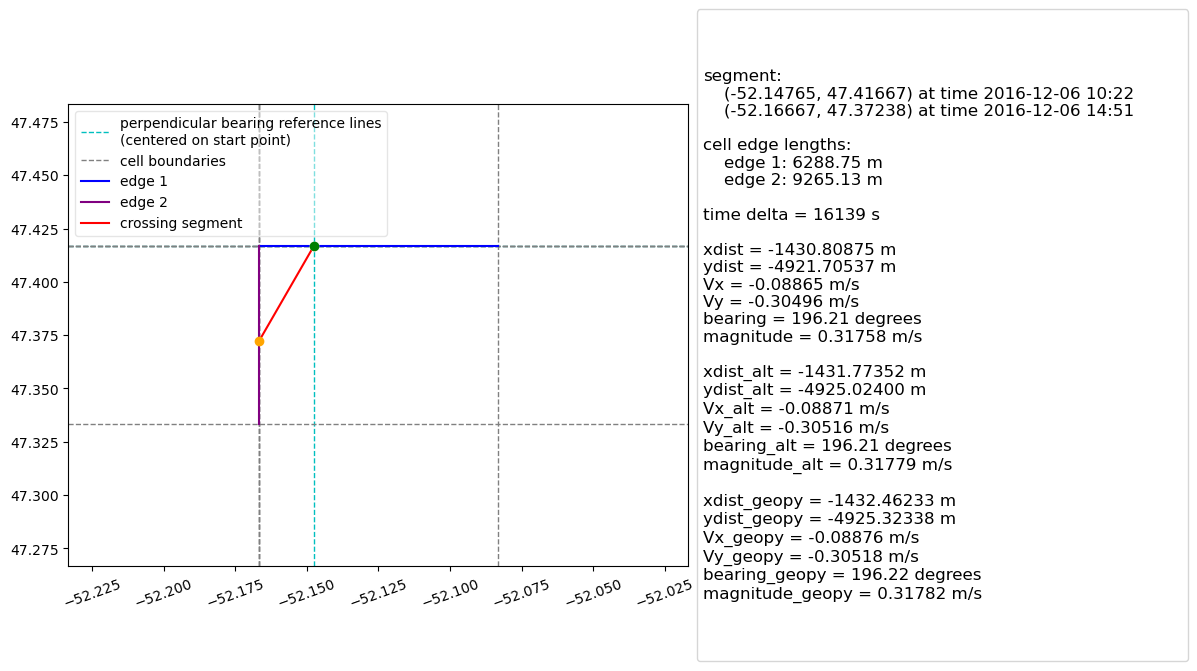

In [2]:
def fmtnum(num, dig=5):
    """convenience function to make the output more readable"""
    num = float(num)
    newnum = '{number:.{digits}f}'.format(number=num, digits=dig)
    return newnum


def plot_segment(start, end, legstr='placeholder'):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1)

    # add some guidelines
    ax.axhline(y=start.yc.values, linewidth=1, linestyle='--', color='c', label='perpendicular bearing reference lines\n(centered on start point)')
    ax.axvline(x=start.xc.values, linewidth=1, linestyle='--', color='c')

    edge_xs = [p[0] for p in start['edges'][0]] + [p[0] for p in end['edges'][0]]
    edge_ys = [p[1] for p in start['edges'][0]] + [p[1] for p in end['edges'][0]]
    for i, xs in enumerate(edge_xs):
        edge_lab = '_no_label_'
        if i == 0:
            edge_lab = 'cell boundaries'
        ax.axvline(x=xs, linewidth=1, linestyle='--', color='gray', label=edge_lab)
    for ys in edge_ys:
        ax.axhline(y=ys, linewidth=1, linestyle='--', color='gray')

    ax.plot([p[0] for p in start['edges'].values[0]], [p[1] for p in start['edges'].values[0]], color='blue', label='edge 1')
    ax.plot([p[0] for p in end['edges'].values[0]], [p[1] for p in end['edges'].values[0]], color='purple', label='edge 2')

    ax.plot([start.xc.values, end.xc.values], [start.yc.values, end.yc.values], 'red', label='crossing segment')  #segstr)
    ax.plot([start.xc.values], [start.yc.values], 'o', color='w', label=legstr)
    ax.plot([start.xc.values], [start.yc.values], 'o', color='g', label='segment start point')
    ax.plot([end.xc.values], [end.yc.values], 'o', color='orange', label='segment end point')
    
    ax.margins(0.8)
    plt.xticks(rotation=20)

    # Put a legend to the right of the current axis by shrinking the current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    h, l = ax.get_legend_handles_labels()
    marker_legs = [0, 1, 2, 3, 4]
    legend1 = plt.legend([h[ml] for ml in marker_legs], [l[ml] for ml in marker_legs], loc='upper left', framealpha=0.5)
    legend2 = plt.legend([h[5]], [l[5]], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, markerfirst=False)
    plt.gca().add_artist(legend1)

    plt.show()
    

def calc_edge_len(edge1, edge2):
    """calculates the length of the cell edges to use for context on the plot"""
    def edge_len(ed):
        e_start = ed[0]
        e_end = ed[1]
        edge_len = distance.distance((e_start[1], e_start[0]), (e_end[1], e_end[0])).m
        return edge_len
    edge1_len = edge_len(edge1['edges'].values[0])
    edge2_len = edge_len(edge2['edges'].values[0])
    return edge1_len, edge2_len


def calculate_magnitude(x, y):
    """Calculate the magnitude of a vector using same method as drift-tool"""
    return np.sqrt(x**2 + y**2)

def calculate_bearing(east, north):
    """Calculate the bearing of a vector using same method as drift-tool"""
    radians = np.arctan2(east, north)
    degrees = radians * 180. / np.pi
    if degrees < 0:
        degrees = degrees + 360
    return degrees

def calculate_vels_via_rect(start, end, dt):
    """calculate crossing segment velocities assuming a rectilinear surface"""
    dlon_degs = (end.xc.values - start.xc.values)[0]
    dlat_degs = (end.yc.values - start.yc.values)[0]
    midlat_degs = np.mean([start.yc.values, end.yc.values])
    R = 6371 * 1000  # in meters instead of km
    dlon_m = R * np.cos(np.deg2rad(midlat_degs)) * np.deg2rad(dlon_degs)
    dlat_m = R * np.deg2rad(dlat_degs)
    Vx = dlon_m/dt
    Vy = dlat_m/dt
    bearing = calculate_bearing(Vx, Vy)
    magnitude = calculate_magnitude(Vx, Vy)
    return magnitude, bearing, Vx, Vy, dlon_m, dlat_m


def calculate_vels_via_nm(start, end, dt):
    """ multiply by 60 to convert degrees to minutes to nautical miles
    multiply by 1852 to convert nautical miles to meters"""
    dlon_degs = (end.xc.values - start.xc.values)[0]
    dlat_degs = (end.yc.values - start.yc.values)[0]
    midlat_degs = np.mean([start.yc.values, end.yc.values])
    dlon_m = (dlon_degs * 60 * math.cos(np.deg2rad(midlat_degs)))* 1852
    dlat_m = (dlat_degs * 60) * 1852
    Vx = dlon_m/dt
    Vy = dlat_m/dt
    bearing = calculate_bearing(Vx, Vy)
    magnitude = calculate_magnitude(Vx, Vy)
    return magnitude, bearing, Vx, Vy, dlon_m, dlat_m


def calculate_vels_via_geopy(start, end, dt):
    """calculate the variables using GeoPy"""
    # get the bearing
    slon_rad = np.deg2rad(start.xc.values[0])
    elon_rad = np.deg2rad(end.xc.values[0])
    slat_rad = np.deg2rad(start.yc.values[0])
    elat_rad = np.deg2rad(end.yc.values[0])
    dLon = elon_rad - slon_rad
    bx = np.cos(elat_rad) * np.sin(dLon)
    by = np.cos(slat_rad) * np.sin(elat_rad) - np.sin(slat_rad) * np.cos(elat_rad) * np.cos(np.deg2rad(dLon))
    brads = np.arctan2(bx, by)
    bdegs = np.degrees(brads)
    if bdegs < 0:
        bdegs = bdegs + 360
    # then the magnitude:
    dist = distance.distance((end.yc.values[0], end.xc.values[0]), (start.yc.values[0], start.xc.values[0])).m
    mag = dist/dt
    # finally the x and y distance and velocity components
    xdist = dist * np.sin(brads)
    ydist = dist * np.cos(brads)
    Vx = mag * np.sin(brads)
    Vy = mag * np.cos(brads)
    return mag, bdegs, Vx, Vy, xdist, ydist

def choose_vel_calc_method(start, end, dt, method='geopy'):
    """Calculate bearing, magnitude and velocity components based on user chosen method.
    The differences between velocities across methods are relatively negligable when considering
    small separation distances between points. These difference will grow as the separation distance
    increases and the rectilinear assumption results will degrade. For the best comparison with a
    particular model, the best choice will be to match the method to the one used by the model."""
    if method == 'geopy':
        magnitude, bearing, Vx, Vy, dlon_m, dlat_m = calculate_vels_via_geopy(start, end, dt)
    elif method == 'nautical_miles': 
        magnitude, bearing, Vx, Vy, dlon_m, dlat_m = calculate_vels_via_nm(start, end, dt)
    elif method == 'rectilinear':
        magnitude, bearing, Vx, Vy, dlon_m, dlat_m = calculate_vels_via_rect(start, end, dt)
    else:
        print('Unrecognized calculation method. Calculating velocities using geopy method.')
        magnitude, bearing, Vx, Vy, dlon_m, dlat_m = calculate_vels_via_geopy(start, end, dt)
    return magnitude, bearing, Vx, Vy, dlon_m, dlat_m


#################################################################
# run though the list of sample points
#################################################################
varsdf_list = []
for ind in range(0, 16):

    # the start and end points for each sample segment:
    start = pd.DataFrame(startlist[ind])
    end = pd.DataFrame(endlist[ind])
    dt = (end['tc'] - start['tc'])[0].total_seconds()

    # The edge lengths to use as a reference
    edge1_len, edge2_len = calc_edge_len(start, end)

    #############################################################
    # calculate bearing, magnitude and velocity components
    #############################################################
    # via converting through nautical miles
    magnitude, bearing, Vx, Vy, Dlon, Dlat = choose_vel_calc_method(start, end, dt, method='nautical_miles')
    # via calculating with geopy
    magnitude_geopy, bearing_geopy, Vx_geopy, Vy_geopy, xdist_geopy, ydist_geopy = choose_vel_calc_method(start, end, dt, method='geopy')
    # via calculating with radius
    magnitude_alt, bearing_alt, Vx_alt, Vy_alt, xdist_alt, ydist_alt = choose_vel_calc_method(start, end, dt, method='rectilinear')
    
    #############################################################
    # make a description string to print to the side of the plot
    #############################################################
    
    def addstr(lstr, new_str):
        new_lstr = (lstr + '\n' + new_str)
        return new_lstr

    legstrs = [
        ('\n\nsegment:\n    (' + str(round(start.xc.values[0], 5)) + ', ' + str(round(start.yc.values[0], 5)) 
         + ') at time ' + str(pd.to_datetime(start.tc.values[0]).strftime('%Y-%m-%d %H:%M')) 
         + '\n    (' + str(round(end.xc.values[0], 5)) + ', ' + str(round(end.yc.values[0], 5)) 
         + ') at time ' + str(pd.to_datetime(end.tc.values[0]).strftime('%Y-%m-%d %H:%M'))),
        ('\ncell edge lengths:\n    edge 1: ' + fmtnum(edge1_len, 2) + ' m\n    edge 2: ' + fmtnum(edge2_len, 2) + ' m'),
        ('\ntime delta = ' + str(round(dt)) + ' s'),
        ('\nxdist = ' + fmtnum(Dlon) + ' m'),
        ('ydist = ' + fmtnum(Dlat) + ' m'),
        ('Vx = ' + fmtnum(Vx) + ' m/s'),
        ('Vy = ' + fmtnum(Vy) + ' m/s'),
        ('bearing = ' + fmtnum(bearing, 2) + ' degrees'),
        ('magnitude = ' + fmtnum(magnitude) + ' m/s'),
        ('\nxdist_alt = ' + fmtnum(xdist_alt) + ' m'),
        ('ydist_alt = ' + fmtnum(ydist_alt) + ' m'),
        ('Vx_alt = ' + fmtnum(Vx_alt) + ' m/s'),
        ('Vy_alt = ' + fmtnum(Vy_alt) + ' m/s'),
        ('bearing_alt = ' + fmtnum(bearing_alt, 2) + ' degrees'),
        ('magnitude_alt = ' + fmtnum(magnitude_alt) + ' m/s'),
        ('\nxdist_geopy = ' + fmtnum(xdist_geopy) + ' m'),
        ('ydist_geopy = ' + fmtnum(ydist_geopy) + ' m'),
        ('Vx_geopy = ' + fmtnum(Vx_geopy) + ' m/s'),
        ('Vy_geopy = ' + fmtnum(Vy_geopy) + ' m/s'),
        ('bearing_geopy = ' + fmtnum(bearing_geopy, 2) + ' degrees'),
        ('magnitude_geopy = ' + fmtnum(magnitude_geopy) + ' m/s'),
        ('\n\n'),
    ]

    legstr = ''
    for lstr in legstrs:
        legstr = addstr(legstr, lstr)

    #############################################################
    # write the variables to a dataframe for easier comparison
    #############################################################
    
    vardf = pd.DataFrame({
        'xdists': [fmtnum(Dlon), fmtnum(xdist_alt), fmtnum(xdist_geopy)],
        'ydists': [fmtnum(Dlat), fmtnum(ydist_alt), fmtnum(ydist_geopy)],
        'Vx': [fmtnum(Vx), fmtnum(Vx_alt), fmtnum(Vx_geopy)],
        'Vy': [fmtnum(Vy), fmtnum(Vy_alt), fmtnum(Vy_geopy)],
        'magnitude': [fmtnum(magnitude), fmtnum(magnitude_alt), fmtnum(magnitude_geopy)],
        'bearing': [fmtnum(bearing), fmtnum(bearing_alt), fmtnum(bearing_geopy)]
    })
    varsdf_list.append(vardf)

    #############################################################
    # plot the data
    #############################################################
    plot_segment(start, end, legstr=legstr)
    

## View the calculated variables in a dataframe to make it easier to compare. 
- row 1 is the original method (ie, converting though nautical miles)
- row 2 is the method suggested by Heather
- row 3 is the method that uses GeoPy 

In [3]:
for varsdf in varsdf_list:
    print('\n\n', varsdf)



   xdists      ydists   Vx       Vy       magnitude bearing  
0  1568.11906  0.00000  0.03829  0.00000  0.03829   90.00000
1  1569.17642  0.00000  0.03832  0.00000  0.03832   90.00000
2  1573.82330  0.00006  0.03843  0.00000  0.03843   90.00000


   xdists     ydists       Vx       Vy        magnitude bearing   
0  241.98196  -9259.85870  0.00179  -0.06869  0.06871   178.50307
1  242.14512  -9266.10250  0.00180  -0.06873  0.06876   178.50307
2  242.31669  -9265.26008  0.00180  -0.06873  0.06875   178.50187


   xdists      ydists       Vx        Vy        magnitude bearing   
0  -353.38263  -9260.28259  -0.00201  -0.05277  0.05281   182.18541
1  -353.62091  -9266.52667  -0.00202  -0.05281  0.05285   182.18541
2  -353.86610  -9265.56528  -0.00202  -0.05280  0.05284   182.18715


   xdists      ydists   Vx        Vy       magnitude bearing   
0  -932.11567  0.00000  -0.01676  0.00000  0.01676   270.00000
1  -932.74418  0.00000  -0.01677  0.00000  0.01677   270.00000
2  -935.49726  0.00